In [ ]:
%load_ext pycodestyle_magic
%flake8_on

### Plot Male and Female photos

In [ ]:
import random
random.seed(1)

In [ ]:
# plot iris data
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join
folder = '../data/raw/iris_data/LG2200/gender/'
onlyfiles = [f for f in listdir(folder+'Female')
             if isfile(join(folder+'Female', f))]

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder+'Female/'+onlyfiles[i]
    # load image pixels
    image = imread(filename, 'tiff')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
# plot iris data
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '../data/raw/iris_data/LG2200/gender/'
onlyfiles = [f for f in listdir(folder+'Male')
             if isfile(join(folder+'Male', f))]

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder+'Male/'+onlyfiles[i]
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)

# show the figure
fig1 = pyplot.gcf()
pyplot.show()
pyplot.draw()
pyplot.savefig('../data/iris_results.png')

### Preprocess photos

In [ ]:
# load iris dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = '../data/raw/train/'

photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('cat'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('iris_Male.npy', photos)
save('iris_female.npy', labels)

In [ ]:
# load and confirm the shape
from numpy import load
photos = load('iris_Male.npy')
labels = load('iris_female.npy')
print(photos.shape, labels.shape)

### Pre-Process Photos into Standard Directories

In [ ]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import random

# create directories
dataset_home = '../data/processed/iris_data/LG2200/gender/'

subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['Male/', 'Female/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
        
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.20
# copy training dataset images into subdirectories

root_directory = '../data/raw/iris_data/LG2200/gender/'
subdirs = ['Male/', 'Female/']
for subdir in subdirs:
    src_directory = root_directory + subdir

    # Let's get the captured irises.
    list_files = listdir(src_directory)
    # There are some irises that doesn't have identification. So we have to filter them first.
    list_files_ok = [sub for sub in list_files if 'd' in sub]
    list_users_with_id = [sub.split('d')[1].split('.')[0] for sub in list_files_ok]

    # We identify the users by deleting repeated users
    list_unique_users = list(set(list_users_with_id))
    print("Lista de individuos sin repetir imágenes de iris: ", len(list_unique_users))

    # Split train - test
    random.shuffle(list_unique_users)
    len_test = round(val_ratio*len(list_unique_users))
    len_train = len(list_unique_users) - len_test
    train_users = list_unique_users[0:len_train]
    test_users = list_unique_users[len_train:]

    train_set = []
    for i in train_users:
        for str_element in list_files_ok:
            if i == str_element.split('d')[1].split('.')[0]:
                train_set.append(str_element)

    test_set = []
    for j in test_users:
        for str_element in list_files_ok:
            if j == str_element.split('d')[1].split('.')[0]:
                test_set.append(str_element)
                
    # Let's copy the different datasets  
    dst_dir = 'train/'
    for file in train_set:
        src = src_directory + '/' + file
        dst = dataset_home + dst_dir + subdir  + file    
        copyfile(src, dst)

    dst_dir = 'test/'
    for file in test_set:
        src = src_directory + '/' + file
        dst = dataset_home + dst_dir + subdir  + file    
        copyfile(src, dst)

In [ ]:
# Small routine to check data leakage 
var = '42'

lista = []
for str_element in train_set:
    lista.append(var == str_element.split('d')[1].split('.')[0])

print('train set')
for i in range(len(np.where(lista)[0])):
    print(train_set[np.where(lista)[0][i]])
    
lista = []
for str_element in test_set:
    lista.append(var == str_element.split('d')[1].split('.')[0])

print('test set')
for i in range(len(np.where(lista)[0])):
    print(test_set[np.where(lista)[0][i]])

#### Create datasets for cross-validation

In [ ]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import random
from sklearn.model_selection import KFold

# create directories
dataset_home = '../data/processed/iris_data/LG2200/gender/train/'
dataset_destination = '../data/processed/iris_data/LG2200/'
cv_subdirs = ['cv1/', 'cv2/', 'cv3/']


subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    for cv_subdir in cv_subdirs:
        labeldirs = ['Male/', 'Female/']
        for labldir in labeldirs:
            newdir = dataset_destination + cv_subdir + subdir + labldir
            makedirs(newdir, exist_ok=True)

# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.20
# copy training dataset images into subdirectories

root_directory = '../data/processed/iris_data/LG2200/gender/train/'
subdirs = ['Male/', 'Female/']

for subdir in subdirs:
    src_directory = root_directory + subdir

    # Let's get the captured irises.
    list_files = listdir(src_directory)
    # There are some irises that doesn't have identification. So we have to filter them first.
    list_files_ok = [sub for sub in list_files if 'd' in sub]
    list_users_with_id = [sub.split('d')[1].split('.')[0] for sub in list_files_ok]

    # We identify the users by deleting repeated users
    list_unique_users = list(set(list_users_with_id))
    print("Lista de individuos sin repetir imágenes de iris: ", len(list_unique_users))
    
    # Let's split the data to perform CV3
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    kf.get_n_splits(list_unique_users)
    
    # Let's start cv folder count
    cv_index = 1
    
    for train_index, test_index in kf.split(list_unique_users):
        X_train, X_test = [list_unique_users[i] for i in train_index], [list_unique_users[i] for i in test_index]

        train_users = X_train
        test_users = X_test

        train_set = []
        for i in train_users:
            for str_element in list_files_ok:
                if i == str_element.split('d')[1].split('.')[0]:
                    train_set.append(str_element)

        test_set = []
        for j in test_users:
            for str_element in list_files_ok:
                if j == str_element.split('d')[1].split('.')[0]:
                    test_set.append(str_element)

        cv_subdir = 'cv'+ str(cv_index) + '/'
        # Let's copy the different datasets  
        dst_dir = 'train/'
        for file in train_set:
            src = src_directory + '/' + file
            dst = dataset_destination + cv_subdir + dst_dir + subdir  + file    
            copyfile(src, dst)

        dst_dir = 'test/'
        for file in test_set:
            src = src_directory + '/' + file
            dst = dataset_destination + cv_subdir + dst_dir + subdir  + file    
            copyfile(src, dst)
        
        # Increase cv folder count
        cv_index = cv_index+1

### Explore Transfer Learning

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = VGG16(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
56/56 [==============================] - 130s 2s/step - loss: 18.3029 - accuracy: 0.5305 - val_loss: 0.6932 - val_accuracy: 0.5359
Epoch 2/100
56/56 [==============================] - 30s 542ms/step - loss: 0.6876 - accuracy: 0.5173 - val_loss: 0.6939 - val_accuracy: 0.5426
Epoch 3/100
56/56 [==============================] - 31s 555ms/step - loss: 0.6899 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.4661
Epoch 4/100
56/56 [==============================] - 29s 523ms/step - loss: 0.6926 - accuracy: 0.5313 - val_loss: 0.6920 - val_accuracy: 0.4651
Epoch 5/100
56/56 [==============================] - 32s 564ms/step - loss: 0.6919 - accuracy: 0.5279 - val_loss: 0.6949 - val_accuracy: 0.4612
Epoch 6/100
56/56 [==============================] - 32s 570ms/step - loss: 0.6831 - accuracy: 0.5145 - val_loss: 0.6909 - val_accuracy: 0.4612
Epoch 7/100
56/56 [==============================] -

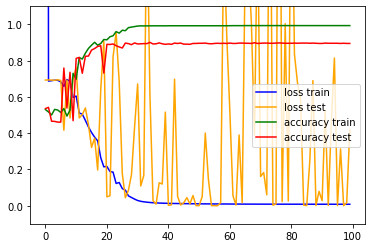

Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


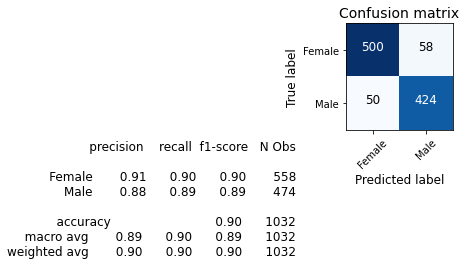

In [1]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = VGG19(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
56/56 [==============================] - 34s 606ms/step - loss: 1.1299 - accuracy: 0.6650 - val_loss: 0.6581 - val_accuracy: 0.6560
Epoch 2/100
56/56 [==============================] - 26s 468ms/step - loss: 0.4744 - accuracy: 0.7843 - val_loss: 0.5389 - val_accuracy: 0.7733
Epoch 3/100
56/56 [==============================] - 26s 472ms/step - loss: 0.2882 - accuracy: 0.8865 - val_loss: 0.3807 - val_accuracy: 0.7432
Epoch 4/100
56/56 [==============================] - 27s 488ms/step - loss: 0.1692 - accuracy: 0.9348 - val_loss: 0.2061 - val_accuracy: 0.7829
Epoch 5/100
56/56 [==============================] - 25s 438ms/step - loss: 0.1076 - accuracy: 0.9610 - val_loss: 0.4352 - val_accuracy: 0.8091
Epoch 6/100
56/56 [==============================] - 26s 470ms/step - loss: 0.0370 - accuracy: 0.9933 - val_loss: 1.0853 - val_accuracy: 0.7771
Epoch 7/100
56/56 [==============================] 

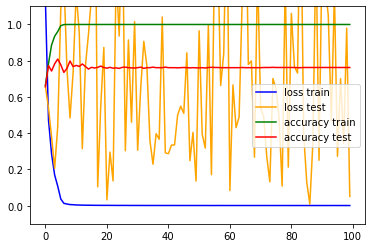

Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


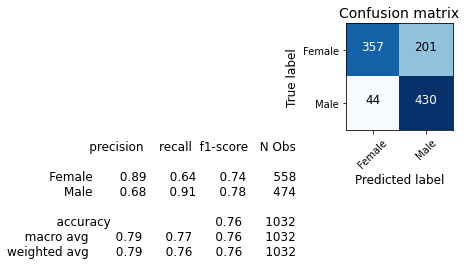

In [1]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = ResNet50(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

171450368/171446536 [==============================] - 6s 0us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
56/56 [==============================] - 41s 730ms/step - loss: 0.9497 - accuracy: 0.6672 - val_loss: 0.3003 - val_accuracy: 0.7016
Epoch 2/100
56/56 [==============================] - 31s 557ms/step - loss: 0.4399 - accuracy: 0.8096 - val_loss: 0.7686 - val_accuracy: 0.7161
Epoch 3/100
56/56 [==============================] - 32s 565ms/step - loss: 0.3027 - accuracy: 0.8719 - val_loss: 0.9166 - val_accuracy: 0.7723
Epoch 4/100
56/56 [==============================] - 31s 558ms/step - loss: 0.1859 - accuracy: 0.9284 - val_loss: 0.2880 - val_accuracy: 0.7122
Epoch 5/100
56/56 [==============================] - 31s 558ms/step - loss: 0.0746 - accuracy: 0.9742 - val_loss: 0.6174 - val_accuracy: 0.7500
Epoch 6/100
56/56 [==============================] - 31s 557ms/step - loss: 0.0389 - accuracy: 0.9919 - val_loss: 1.5202 - val_accuracy: 0.6948
Epoch 7/100
56/56 [==============================] 

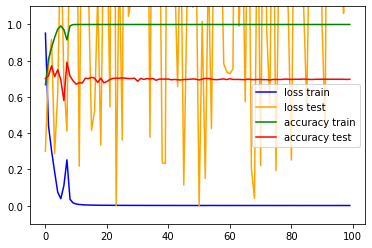

Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


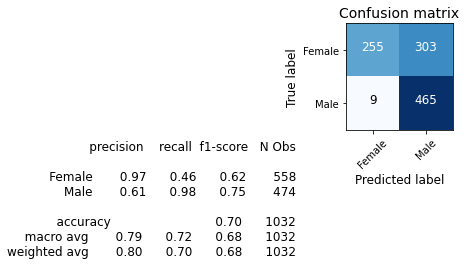

In [3]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.resnet import ResNet101
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = ResNet101(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
56/56 [==============================] - 55s 973ms/step - loss: 1.1631 - accuracy: 0.6737 - val_loss: 0.6029 - val_accuracy: 0.6492
Epoch 2/100
56/56 [==============================] - 44s 780ms/step - loss: 0.3920 - accuracy: 0.8217 - val_loss: 0.5554 - val_accuracy: 0.7132
Epoch 3/100
56/56 [==============================] - 44s 782ms/step - loss: 0.2780 - accuracy: 0.8801 - val_loss: 0.4891 - val_accuracy: 0.7849
Epoch 4/100
56/56 [==============================] - 44s 782ms/step - loss: 0.2899 - accuracy: 0.8930 - val_loss: 0.6996 - val_accuracy: 0.5649
Epoch 5/100
56/56 [==============================] - 44s 783ms/step - loss: 0.1963 - accuracy: 0.9149 - val_loss: 0.1886 - val_accuracy: 0.7742
Epoch 6/100
56/56 [==============================] - 44s 784ms/step - loss: 0.1881 - accuracy: 0.9273 - val_loss: 1.0033 - val_accuracy: 0.6841
Epoch 7/100
56/56 [==============================] 

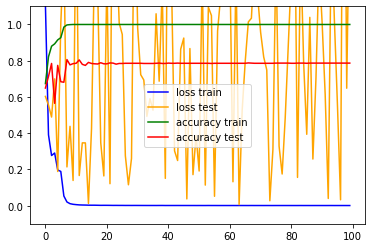

Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


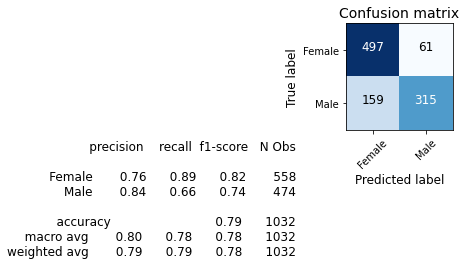

In [1]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.resnet import ResNet152
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = ResNet152(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
112/112 [==============================] - 135s 1s/step - loss: 0.4627 - accuracy: 0.8012 - val_loss: 0.6618 - val_accuracy: 0.7393
Epoch 2/100
112/112 [==============================] - 53s 476ms/step - loss: 0.1021 - accuracy: 0.9671 - val_loss: 0.3023 - val_accuracy: 0.8915
Epoch 3/100
112/112 [==============================] - 53s 477ms/step - loss: 0.0319 - accuracy: 0.9935 - val_loss: 0.0133 - val_accuracy: 0.9147
Epoch 4/100
112/112 [==============================] - 53s 471ms/step - loss: 0.0141 - accuracy: 0.9983 - val_loss: 0.0106 - val_accuracy: 0.9293
Epoch 5/100
112/112 [==============================] - 53s 472ms/step - loss: 0.0097 - accuracy: 0.9989 - val_loss: 0.2108 - val_accuracy: 0.9244
Epoch 6/100
112/112 [==============================] - 53s 475ms/step - loss: 0.0070 - accuracy: 0.9997 - val_loss: 0.3923 - val_accuracy: 0.9390
Epoch 7/100
112/112 [====================

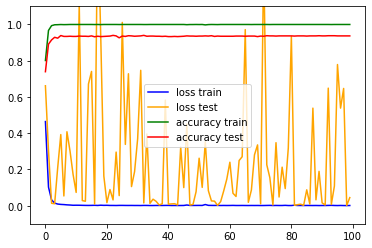

D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


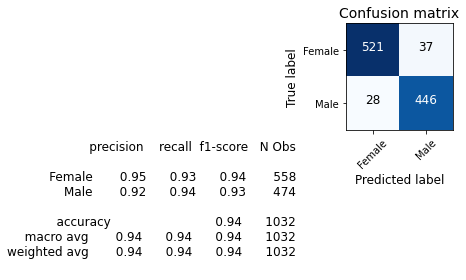

In [1]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.resnet_v2 import ResNet50V2
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Add
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler


from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = ResNet50V2(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = True
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    class2 = BatchNormalization()(class1)
    output = Dense(1, activation='sigmoid')(class2)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    batch_size = 32
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=batch_size, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=batch_size, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.ResNet101V2 import ResNet101V2
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = ResNet101V2(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
56/56 [==============================] - 34s 606ms/step - loss: 1.1299 - accuracy: 0.6650 - val_loss: 0.6581 - val_accuracy: 0.6560
Epoch 2/100
56/56 [==============================] - 26s 468ms/step - loss: 0.4744 - accuracy: 0.7843 - val_loss: 0.5389 - val_accuracy: 0.7733
Epoch 3/100
56/56 [==============================] - 26s 472ms/step - loss: 0.2882 - accuracy: 0.8865 - val_loss: 0.3807 - val_accuracy: 0.7432
Epoch 4/100
56/56 [==============================] - 27s 488ms/step - loss: 0.1692 - accuracy: 0.9348 - val_loss: 0.2061 - val_accuracy: 0.7829
Epoch 5/100
56/56 [==============================] - 25s 438ms/step - loss: 0.1076 - accuracy: 0.9610 - val_loss: 0.4352 - val_accuracy: 0.8091
Epoch 6/100
56/56 [==============================] - 26s 470ms/step - loss: 0.0370 - accuracy: 0.9933 - val_loss: 1.0853 - val_accuracy: 0.7771
Epoch 7/100
56/56 [==============================] 

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.ResNet152V2 import ResNet152V2
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = ResNet152V2(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
56/56 [==============================] - 34s 606ms/step - loss: 1.1299 - accuracy: 0.6650 - val_loss: 0.6581 - val_accuracy: 0.6560
Epoch 2/100
56/56 [==============================] - 26s 468ms/step - loss: 0.4744 - accuracy: 0.7843 - val_loss: 0.5389 - val_accuracy: 0.7733
Epoch 3/100
56/56 [==============================] - 26s 472ms/step - loss: 0.2882 - accuracy: 0.8865 - val_loss: 0.3807 - val_accuracy: 0.7432
Epoch 4/100
56/56 [==============================] - 27s 488ms/step - loss: 0.1692 - accuracy: 0.9348 - val_loss: 0.2061 - val_accuracy: 0.7829
Epoch 5/100
56/56 [==============================] - 25s 438ms/step - loss: 0.1076 - accuracy: 0.9610 - val_loss: 0.4352 - val_accuracy: 0.8091
Epoch 6/100
56/56 [==============================] - 26s 470ms/step - loss: 0.0370 - accuracy: 0.9933 - val_loss: 1.0853 - val_accuracy: 0.7771
Epoch 7/100
56/56 [==============================] 

#### Explore Transfer Learning: Mobile Networks

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
112/112 [==============================] - 43s 384ms/step - loss: 0.5361 - accuracy: 0.7560 - val_loss: 1.6478 - val_accuracy: 0.5407
Epoch 2/100
112/112 [==============================] - 36s 323ms/step - loss: 0.3891 - accuracy: 0.8270 - val_loss: 1.3785 - val_accuracy: 0.6599
Epoch 3/100
112/112 [==============================] - 36s 323ms/step - loss: 0.2786 - accuracy: 0.8902 - val_loss: 0.6411 - val_accuracy: 0.8266
Epoch 4/100
112/112 [==============================] - 36s 324ms/step - loss: 0.2286 - accuracy: 0.9068 - val_loss: 1.0742 - val_accuracy: 0.8508
Epoch 5/100
112/112 [==============================] - 36s 325ms/step - loss: 0.1589 - accuracy: 0.9340 - val_loss: 0.2422 - val_accuracy: 0.9060
Epoch 6/100
112/112 [==============================] - 36s 325ms/step - loss: 0.1285 - accuracy: 0.9486 - val_loss: 0.3736 - val_accuracy: 0.8769
Epoch 7/100
112/112 [==================

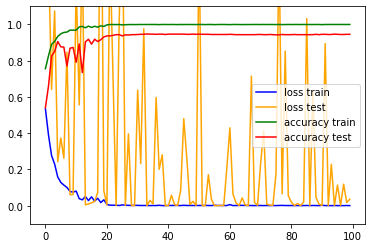

D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


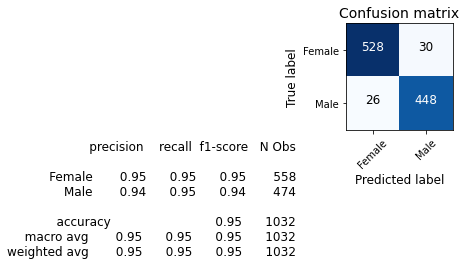

In [1]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Add
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau


from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = MobileNet(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = True
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    class2 = BatchNormalization()(class1)
    output = Dense(1, activation='sigmoid')(class2)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.1, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    batch_size = 32
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=batch_size, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=batch_size, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    callbacks_list = [ModelCheckpoint(filepath='model.h5', save_best_only=True), reduce_lr]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 2s 0us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
112/112 [==============================] - 57s 512ms/step - loss: 0.4709 - accuracy: 0.7838 - val_loss: 1.5754 - val_accuracy: 0.6056
Epoch 2/100
112/112 [==============================] - 46s 413ms/step - loss: 0.1415 - accuracy: 0.9562 - val_loss: 0.8121 - val_accuracy: 0.6492
Epoch 3/100
112/112 [==============================] - 46s 407ms/step - loss: 0.0432 - accuracy: 0.9910 - val_loss: 0.4237 - val_accuracy: 0.6492
Epoch 4/100
112/112 [==============================] - 44s 396ms/step - loss: 0.0187 - accuracy: 0.9983 - val_loss: 0.6588 - val_accuracy: 0.6066
Epoch 5/100
112/112 [==============================] - 44s 396ms/step - loss: 0.0123 - accuracy: 0.9994 - val_loss: 1.2378 - val_accuracy: 0.6318
Epoch 6/100
112/112 [==============================] - 44s 392ms/step - loss: 0.0114 - accuracy: 0.9994 - val_loss: 1.2766 - val_accuracy: 0.6550
Epoch 7/100
112/112 [==================

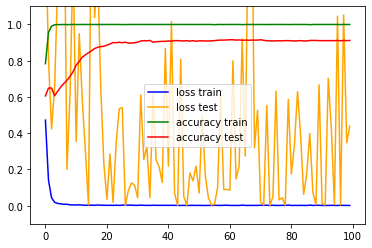

D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


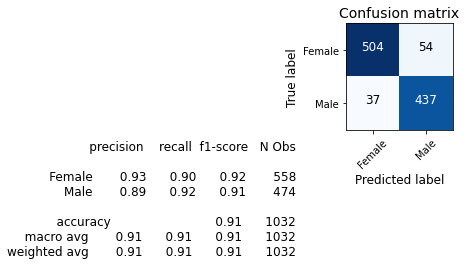

In [1]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.mobilenet_v2 import MobileNetV2v
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Add
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler


from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = MobileNetV2(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = True
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    class2 = BatchNormalization()(class1)
    output = Dense(1, activation='sigmoid')(class2)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    batch_size = 32
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=batch_size, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=batch_size, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
223/223 [==============================] - 105s 469ms/step - loss: 0.4293 - accuracy: 0.8169 - val_loss: 0.6757 - val_accuracy: 0.8866
Epoch 2/100
223/223 [==============================] - 79s 354ms/step - loss: 0.1599 - accuracy: 0.9374 - val_loss: 0.0077 - val_accuracy: 0.9234
Epoch 3/100
223/223 [==============================] - 83s 371ms/step - loss: 0.0809 - accuracy: 0.9730 - val_loss: 0.1435 - val_accuracy: 0.9273
Epoch 4/100
223/223 [==============================] - 90s 404ms/step - loss: 0.0646 - accuracy: 0.9787 - val_loss: 0.1285 - val_accuracy: 0.8924
Epoch 5/100
223/223 [==============================] - 87s 392ms/step - loss: 0.0303 - accuracy: 0.9927 - val_loss: 0.1062 - val_accuracy: 0.9322
Epoch 6/100
223/223 [==============================] - 81s 365ms/step - loss: 0.0354 - accuracy: 0.9874 - val_loss: 0.1247 - val_accuracy: 0.9409
Epoch 7/100
223/223 [=================

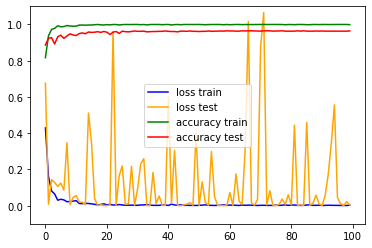

D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


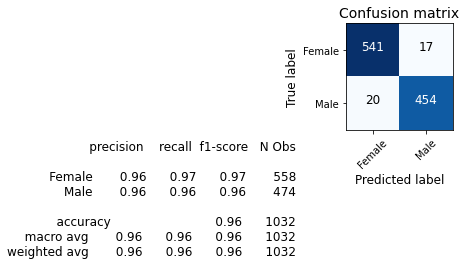

In [1]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.densenet import DenseNet121
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Add
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler


from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = DenseNet121(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = True
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    class2 = BatchNormalization()(class1)
    output = Dense(1, activation='sigmoid')(class2)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    batch_size = 16
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=batch_size, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=batch_size, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
255/255 [==============================] - 160s 627ms/step - loss: 0.4264 - accuracy: 0.8127 - val_loss: 0.2420 - val_accuracy: 0.8692
Epoch 2/100
255/255 [==============================] - 103s 403ms/step - loss: 0.1819 - accuracy: 0.9287 - val_loss: 0.4288 - val_accuracy: 0.9079
Epoch 3/100
255/255 [==============================] - 107s 418ms/step - loss: 0.0901 - accuracy: 0.9666 - val_loss: 0.0097 - val_accuracy: 0.8789
Epoch 4/100
255/255 [==============================] - 102s 398ms/step - loss: 0.0791 - accuracy: 0.9733 - val_loss: 0.0025 - val_accuracy: 0.9283
Epoch 5/100
255/255 [==============================] - 108s 424ms/step - loss: 0.0475 - accuracy: 0.9843 - val_loss: 0.0198 - val_accuracy: 0.9273
Epoch 6/100
255/255 [==============================] - 108s 424ms/step - loss: 0.0391 - accuracy: 0.9868 - val_loss: 0.1318 - val_accuracy: 0.9215
Epoch 7/100
255/255 [============

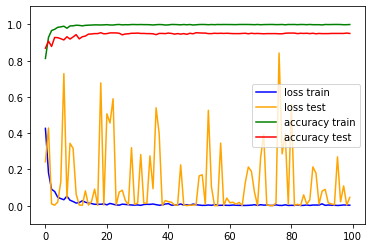

D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


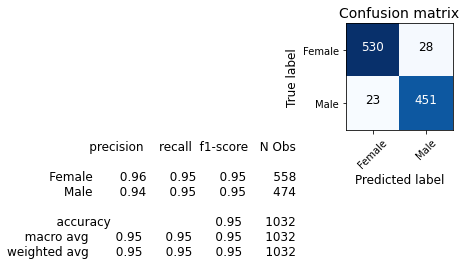

In [1]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.densenet import DenseNet169
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Add
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler


from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = DenseNet169(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = True
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    class2 = BatchNormalization()(class1)
    output = Dense(1, activation='sigmoid')(class2)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    batch_size = 14
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=batch_size, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=batch_size, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
56/56 [==============================] - 186s 3s/step - loss: 0.5813 - accuracy: 0.7240 - val_loss: 0.4644 - val_accuracy: 0.5494
Epoch 2/100
56/56 [==============================] - 47s 830ms/step - loss: 0.2397 - accuracy: 0.9090 - val_loss: 1.2967 - val_accuracy: 0.5359
Epoch 3/100
56/56 [==============================] - 49s 876ms/step - loss: 0.0997 - accuracy: 0.9716 - val_loss: 0.5286 - val_accuracy: 0.5184
Epoch 4/100
56/56 [==============================] - 48s 852ms/step - loss: 0.0330 - accuracy: 0.9969 - val_loss: 0.9196 - val_accuracy: 0.5659
Epoch 5/100
56/56 [==============================] - 47s 845ms/step - loss: 0.0185 - accuracy: 0.9989 - val_loss: 0.7513 - val_accuracy: 0.5824
Epoch 6/100
56/56 [==============================] - 47s 847ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.6819 - val_accuracy: 0.5659
Epoch 7/100
56/56 [==============================] - 

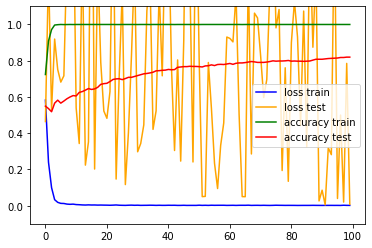

D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


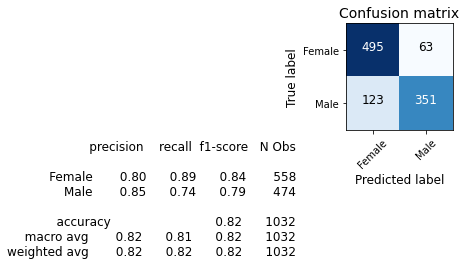

In [1]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.nasnet import NASNetMobile
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Add
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler


from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = NASNetMobile(include_top=False)
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = True
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    class2 = BatchNormalization()(class1)
    output = Dense(1, activation='sigmoid')(class2)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(224, 224))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(224, 224))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    batch_size = 64
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=batch_size, target_size=(224, 224))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=batch_size, target_size=(224, 224))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

#### Explore Transfer Learning: Mobile Networks - Data augmentation

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Add
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau


from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report



# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])

# define cnn model
def define_model():
	# load model
    model = MobileNet(include_top=False, dropout = 0.5, input_shape=(240, 320, 3), weights = None)
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = True
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    class2 = BatchNormalization()(class1)
    class3 = Dropout(0.5) (class2)
    output = Dense(1, activation='sigmoid')(class3)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    batch_size = 32
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
#     # create data generator
#     datagen = ImageDataGenerator(featurewise_center=True)
#     # specify imagenet mean values for centering
#     datagen.mean = [123.68, 116.779, 103.939]
#     # prepare iterator
#     train_it = datagen.flow_from_directory(train_path,
#     class_mode='binary', batch_size=batch_size, target_size=(240, 320))
#     test_it = datagen.flow_from_directory(test_path,
#     class_mode='binary', batch_size=batch_size, target_size=(240, 320))

    # create data generators
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
        width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory(train_path,
        class_mode='binary', batch_size=batch_size, target_size=(240, 320))
    test_it = test_datagen.flow_from_directory(test_path,
        class_mode='binary', batch_size=batch_size, target_size=(240, 320))    
    
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    callbacks_list = [ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, test_datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

#### Explore Transfer Learning: Mobile Networks - Fine - Tuning

Using TensorFlow backend.
D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 4s 0us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
112/112 [==============================] - 98s 875ms/step - loss: 1.0568 - accuracy: 0.5673 - val_loss: 0.9763 - val_accuracy: 0.5833
Epoch 2/50
112/112 [==============================] - 92s 822ms/step - loss: 0.8477 - accuracy: 0.6304 - val_loss: 0.7082 - val_accuracy: 0.6696
Epoch 3/50
112/112 [==============================] - 88s 787ms/step - loss: 0.7260 - accuracy: 0.6650 - val_loss: 0.2638 - val_accuracy: 0.7064
Epoch 4/50
112/112 [==============================] - 100s 893ms/step - loss: 0.7186 - accuracy: 0.6925 - val_loss: 0.5068 - val_accuracy: 0.7180
Epoch 5/50
112/112 [==============================] - 96s 855ms/step - loss: 0.6532 - accuracy: 0.7065 - val_loss: 0.3332 - val_accuracy: 0.7267
Epoch 6/50
112/112 [==============================] - 87s 777ms/step - loss: 0.6150 - accuracy: 0.7200 - val_loss:

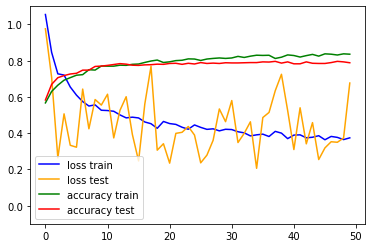

In [1]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adadelta
from keras.optimizers import Adagrad
from keras.optimizers import Adam
from keras.optimizers import Adamax
from keras.optimizers import Nadam
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Add
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report



# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])

# define cnn model
def define_model():
	# load model
    model = MobileNet(include_top=False, dropout = 0.5, input_shape=(240, 320, 3), weights = None)
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = True
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    class2 = BatchNormalization()(class1)
    class3 = Dropout(0.5) (class2)
    output = Dense(1, activation='sigmoid')(class3)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'

# run the test harness for evaluating a model
#def run_test_harness():
batch_size = 32
epochs = 50
dropout = 0.8
train_path = dataset_home + 'train/'
test_path = dataset_home + 'test/'

# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = train_datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=batch_size, target_size=(240, 320))
test_it = test_datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=batch_size, target_size=(240, 320))    

# Define Model
K.clear_session()
mobilenetModel = MobileNet(include_top=False, dropout = dropout, input_shape=(240, 320, 3), weights = 'imagenet')
# mark loaded layers as not trainable
for layer in mobilenetModel.layers:
    layer.trainable = False
# add new classifier layers
flat1 = Flatten()(mobilenetModel.layers[-1].output)
class1 = Dense(32, activation='relu', kernel_initializer='lecun_normal')(flat1)
class2 = BatchNormalization()(class1)
class3 = Dropout(dropout) (class2)
output = Dense(1, activation='sigmoid')(class3)

## Initializers: Orthogonal, TruncatedNormal, he_uniform, lecun_uniform, glorot_normal, glorot_uniform, lecun_normal (excelentes resultados)

#     # print layers
#     print("\r\r\r\r")
#     for layer in mobilenetModel.layers:
#         print("{}: {}".format(layer, layer.trainable))

# define new model
baseModel = Model(inputs=mobilenetModel.inputs, outputs=output)

#     # Check the trainable status of the individual layers
#     print("\r\r\r\r")
#     for layer in baseModel.layers:
#         print("{}: {}".format(layer, layer.trainable))

# compile model
opt = SGD(lr=5e-5, momentum=0.6)
# opt = RMSprop(learning_rate=0.0001, rho=0.99)
# opt = Adagrad(learning_rate=0.001)
# opt = Adadelta(learning_rate=1.0, rho=0.99)
# opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)
# opt = Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
# opt = Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
baseModel.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(exp_decay)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                          patience=5, min_lr=0.01)
callbacks_list = [ModelCheckpoint(filepath='model.h5', save_best_only=True)]
# fit model
history1 = baseModel.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=epochs, verbose=1, 
                                  callbacks=callbacks_list)
# evaluate model
test_it.reset()
_, acc = baseModel.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print(train_it.class_indices)
#print(baseModel.summary())
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history1)
#print_metrics(baseModel, test_datagen, test_path)


# # Duplicate Model
# model = baseModel

# # now that the head FC layers have been trained/initialized, lets
# # unfreeze the final set of CONV layers and make them trainable
# for layer in model.layers:
#     layer.trainable = True

# # loop over the layers in the model and show which ones are trainable
# # or not
# #     print("\r\r\r\r")
# #     for layer in model.layers:
# #         print("{}: {}".format(layer, layer.trainable))
# # compile model

# opt = SGD(lr=1.0e-4, momentum=0.9)
# model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# # learning schedule callback
# lrate = LearningRateScheduler(exp_decay)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                           patience=5, min_lr=0.001)
# callbacks_list = [ModelCheckpoint(filepath='model.h5', save_best_only=True)]
# # fit model
# history2 = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
#                               validation_data=test_it, 
#                               validation_steps=len(test_it), 
#                               epochs=epochs, verbose=1, 
#                               callbacks=callbacks_list)
# # evaluate model
# test_it.reset()
# _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
# print(train_it.class_indices)
# #print(model.summary())
# print('> %.3f' % (acc * 100.0))
# # learning curves
# summarize_diagnostics(history2)
# #print_metrics(model, test_datagen, test_path)
    
    
# # entry point, run the test harness
# dataset_home = '../data/processed/iris_data/LG2200/gender/'
# #run_test_harness()

In [33]:
baseModel.save('Base_Model.h5')

Epoch 1/50
112/112 [==============================] - 123s 1s/step - loss: 0.3714 - accuracy: 0.8298 - val_loss: 0.4073 - val_accuracy: 0.7926
Epoch 2/50
112/112 [==============================] - 102s 914ms/step - loss: 0.3726 - accuracy: 0.8388 - val_loss: 0.2869 - val_accuracy: 0.8188
Epoch 3/50
112/112 [==============================] - 109s 977ms/step - loss: 0.3804 - accuracy: 0.8388 - val_loss: 0.8677 - val_accuracy: 0.8401
Epoch 4/50
112/112 [==============================] - 107s 958ms/step - loss: 0.3685 - accuracy: 0.8324 - val_loss: 0.3273 - val_accuracy: 0.8324
Epoch 5/50
112/112 [==============================] - 110s 982ms/step - loss: 0.3504 - accuracy: 0.8374 - val_loss: 1.1967 - val_accuracy: 0.8527
Epoch 6/50
112/112 [==============================] - 113s 1s/step - loss: 0.3651 - accuracy: 0.8374 - val_loss: 0.2214 - val_accuracy: 0.8731
Epoch 7/50
112/112 [==============================] - 111s 987ms/step - loss: 0.3605 - accuracy: 0.8405 - val_loss: 0.3727 - val_a

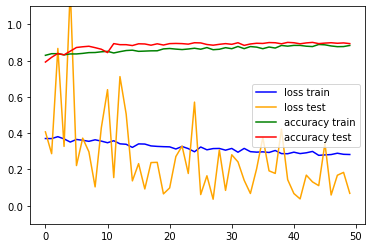

In [37]:
from keras.models import clone_model
from keras.models import load_model
# Duplicate Model
# model= clone_model(baseModel)
model_all_layers_trained = load_model('Base_Model.h5')

# # loop over the layers in the model and show which ones are trainable
# # or not
# print("\r\r\r\r")
# for layer in model_all_layers_trained.layers:
#     print("{}: {}".format(layer, layer.trainable))


# now that the head FC layers have been trained/initialized, lets
# unfreeze the final set of CONV layers and make them trainable
for layer in model_all_layers_trained.layers:
    layer.trainable = True

# # loop over the layers in the model and show which ones are trainable
# # or not
# print("\r\r\r\r")
# for layer in model_all_layers_trained.layers:
#     print("{}: {}".format(layer, layer.trainable))

# compile model
#opt = SGD(lr=1.0e-6, momentum=0.9)
opt = SGD(lr=5e-5, momentum=0.6)
model_all_layers_trained.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(exp_decay)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                          patience=5, min_lr=0.001)
callbacks_list = [ModelCheckpoint(filepath='model.h5', save_best_only=True)]
# fit model
history_all_layers_trained = model_all_layers_trained.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                                                      validation_data=test_it, 
                                                                      validation_steps=len(test_it), 
                                                                      epochs=epochs, verbose=1, 
                                                                      callbacks=callbacks_list)
# evaluate model
test_it.reset()
_, acc = model_all_layers_trained.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print(train_it.class_indices)
#print(model.summary())
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history_all_layers_trained)
#print_metrics(model, test_datagen, test_path)
    
    
# entry point, run the test harness
# dataset_home = '../data/processed/iris_data/LG2200/gender/'
#run_test_harness()

Epoch 1/50
112/112 [==============================] - 158s 1s/step - loss: 0.2730 - accuracy: 0.8967 - val_loss: 0.3737 - val_accuracy: 0.8934
Epoch 2/50
112/112 [==============================] - 139s 1s/step - loss: 0.2660 - accuracy: 0.8924 - val_loss: 0.0818 - val_accuracy: 0.8924
Epoch 3/50
112/112 [==============================] - 142s 1s/step - loss: 0.2658 - accuracy: 0.8939 - val_loss: 0.1616 - val_accuracy: 0.9012
Epoch 4/50
112/112 [==============================] - 139s 1s/step - loss: 0.2957 - accuracy: 0.8832 - val_loss: 0.2781 - val_accuracy: 0.8963
Epoch 5/50
112/112 [==============================] - 141s 1s/step - loss: 0.2777 - accuracy: 0.8871 - val_loss: 0.1380 - val_accuracy: 0.9021
Epoch 6/50
112/112 [==============================] - 138s 1s/step - loss: 0.2643 - accuracy: 0.9000 - val_loss: 0.1039 - val_accuracy: 0.9021
Epoch 7/50
112/112 [==============================] - 140s 1s/step - loss: 0.2694 - accuracy: 0.8924 - val_loss: 0.3193 - val_accuracy: 0.8953

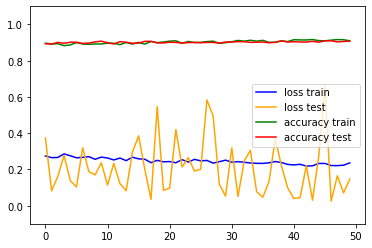

In [45]:
history_all_layers_trained = model_all_layers_trained.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                                                      validation_data=test_it, 
                                                                      validation_steps=len(test_it), 
                                                                      epochs=epochs, verbose=1, 
                                                                      callbacks=callbacks_list)
# evaluate model
test_it.reset()
_, acc = model_all_layers_trained.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print(train_it.class_indices)
#print(model.summary())
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history_all_layers_trained)

Epoch 1/50
112/112 [==============================] - 140s 1s/step - loss: 0.3664 - accuracy: 0.8360 - val_loss: 0.4937 - val_accuracy: 0.7878
Epoch 2/50
112/112 [==============================] - 141s 1s/step - loss: 0.3609 - accuracy: 0.8470 - val_loss: 0.4750 - val_accuracy: 0.7917
Epoch 3/50
112/112 [==============================] - 120s 1s/step - loss: 0.3571 - accuracy: 0.8408 - val_loss: 0.4285 - val_accuracy: 0.7878
Epoch 4/50
112/112 [==============================] - 140s 1s/step - loss: 0.3676 - accuracy: 0.8408 - val_loss: 0.6952 - val_accuracy: 0.7878
Epoch 5/50
112/112 [==============================] - 133s 1s/step - loss: 0.3632 - accuracy: 0.8408 - val_loss: 0.4490 - val_accuracy: 0.7926
Epoch 6/50
112/112 [==============================] - 138s 1s/step - loss: 0.3519 - accuracy: 0.8478 - val_loss: 0.4029 - val_accuracy: 0.7878
Epoch 7/50
112/112 [==============================] - 135s 1s/step - loss: 0.3456 - accuracy: 0.8565 - val_loss: 0.3562 - val_accuracy: 0.7917

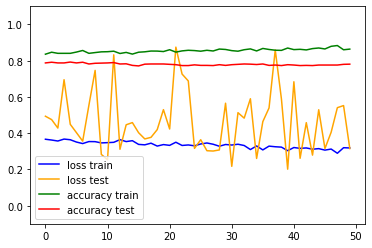

In [39]:
from keras.models import clone_model
from keras.models import load_model
# Duplicate Model
# model= clone_model(baseModel)
model1 = load_model('Base_Model.h5')

# # loop over the layers in the model and show which ones are trainable
# # or not
# print("\r\r\r\r")
# for layer in model1.layers:
#     print("{}: {}".format(layer, layer.trainable))


# now that the head FC layers have been trained/initialized, lets
# unfreeze the final set of CONV layers and make them trainable
for layer in [model1.layers[j] for j in range((len(model1.layers)-5-3), (len(model1.layers)-5))]:
    layer.trainable = True


# # loop over the layers in the model and show which ones are trainable
# # or not
# print("\r\r\r\r")
# for layer in model1.layers:
#     print("{}: {}".format(layer, layer.trainable))

# compile model
#opt = SGD(lr=1.0e-6, momentum=0.9)
opt = SGD(lr=5e-5, momentum=0.6)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(exp_decay)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                          patience=5, min_lr=0.001)
callbacks_list = [ModelCheckpoint(filepath='model.h5', save_best_only=True)]
# fit model
history1 = model1.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                                                      validation_data=test_it, 
                                                                      validation_steps=len(test_it), 
                                                                      epochs=epochs, verbose=1, 
                                                                      callbacks=callbacks_list)
# evaluate model
test_it.reset()
_, acc = model1.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print(train_it.class_indices)
#print(model.summary())
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history1)
#print_metrics(model, test_datagen, test_path)
    
    
# entry point, run the test harness
# dataset_home = '../data/processed/iris_data/LG2200/gender/'
#run_test_harness()

Epoch 1/50
112/112 [==============================] - 147s 1s/step - loss: 0.3736 - accuracy: 0.8436 - val_loss: 0.6459 - val_accuracy: 0.7665
Epoch 2/50
112/112 [==============================] - 128s 1s/step - loss: 0.3891 - accuracy: 0.8265 - val_loss: 0.9695 - val_accuracy: 0.7645
Epoch 3/50
112/112 [==============================] - 144s 1s/step - loss: 0.3662 - accuracy: 0.8405 - val_loss: 0.4629 - val_accuracy: 0.7684
Epoch 4/50
112/112 [==============================] - 132s 1s/step - loss: 0.3613 - accuracy: 0.8377 - val_loss: 0.5058 - val_accuracy: 0.7674
Epoch 5/50
112/112 [==============================] - 128s 1s/step - loss: 0.3570 - accuracy: 0.8439 - val_loss: 0.3952 - val_accuracy: 0.7713
Epoch 6/50
112/112 [==============================] - 135s 1s/step - loss: 0.3534 - accuracy: 0.8349 - val_loss: 0.3468 - val_accuracy: 0.7742
Epoch 7/50
112/112 [==============================] - 125s 1s/step - loss: 0.3594 - accuracy: 0.8470 - val_loss: 0.3189 - val_accuracy: 0.7733

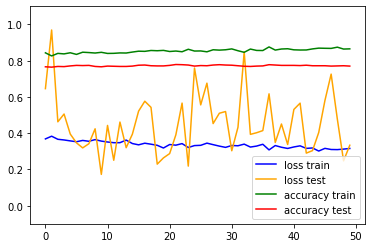

In [42]:
from keras.models import clone_model
from keras.models import load_model
# Duplicate Model
# model= clone_model(baseModel)
model1 = load_model('Base_Model.h5')

# # loop over the layers in the model and show which ones are trainable
# # or not
# print("\r\r\r\r")
# for layer in model1.layers:
#     print("{}: {}".format(layer, layer.trainable))


# now that the head FC layers have been trained/initialized, lets
# unfreeze the final set of CONV layers and make them trainable
for layer in [model1.layers[j] for j in range((len(model1.layers)-5-6), (len(model1.layers)-5))]:
    layer.trainable = True


# # loop over the layers in the model and show which ones are trainable
# # or not
# print("\r\r\r\r")
# for layer in model1.layers:
#     print("{}: {}".format(layer, layer.trainable))

# compile model
#opt = SGD(lr=1.0e-6, momentum=0.9)
opt = SGD(lr=5e-5, momentum=0.6)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(exp_decay)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                          patience=5, min_lr=0.001)
callbacks_list = [ModelCheckpoint(filepath='model.h5', save_best_only=True)]
# fit model
history1 = model1.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                                                      validation_data=test_it, 
                                                                      validation_steps=len(test_it), 
                                                                      epochs=epochs, verbose=1, 
                                                                      callbacks=callbacks_list)
# evaluate model
test_it.reset()
_, acc = model1.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print(train_it.class_indices)
#print(model.summary())
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history1)
#print_metrics(model, test_datagen, test_path)
    
    
# entry point, run the test harness
# dataset_home = '../data/processed/iris_data/LG2200/gender/'
#run_test_harness()

Epoch 1/50
112/112 [==============================] - 167s 1s/step - loss: 0.3697 - accuracy: 0.8321 - val_loss: 0.3198 - val_accuracy: 0.7665
Epoch 2/50
112/112 [==============================] - 145s 1s/step - loss: 0.3695 - accuracy: 0.8399 - val_loss: 0.2766 - val_accuracy: 0.7578
Epoch 3/50
112/112 [==============================] - 150s 1s/step - loss: 0.3643 - accuracy: 0.8413 - val_loss: 0.9400 - val_accuracy: 0.7558
Epoch 4/50
112/112 [==============================] - 161s 1s/step - loss: 0.3662 - accuracy: 0.8385 - val_loss: 0.1804 - val_accuracy: 0.7597
Epoch 5/50
112/112 [==============================] - 152s 1s/step - loss: 0.3610 - accuracy: 0.8382 - val_loss: 0.4953 - val_accuracy: 0.7558
Epoch 6/50
112/112 [==============================] - 158s 1s/step - loss: 0.3476 - accuracy: 0.8512 - val_loss: 0.6417 - val_accuracy: 0.7607
Epoch 7/50
112/112 [==============================] - 167s 1s/step - loss: 0.3527 - accuracy: 0.8551 - val_loss: 0.3950 - val_accuracy: 0.7655

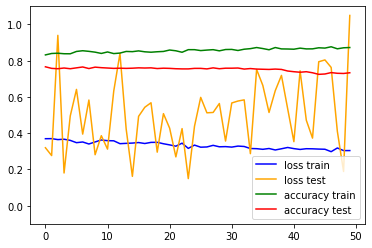

In [44]:
from keras.models import clone_model
from keras.models import load_model
# Duplicate Model
# model= clone_model(baseModel)
model1 = load_model('Base_Model.h5')

# # loop over the layers in the model and show which ones are trainable
# # or not
# print("\r\r\r\r")
# for layer in model1.layers:
#     print("{}: {}".format(layer, layer.trainable))


# now that the head FC layers have been trained/initialized, lets
# unfreeze the final set of CONV layers and make them trainable
for layer in [model1.layers[j] for j in range((len(model1.layers)-5-9), (len(model1.layers)-5))]:
    layer.trainable = True


# # loop over the layers in the model and show which ones are trainable
# # or not
# print("\r\r\r\r")
# for layer in model1.layers:
#     print("{}: {}".format(layer, layer.trainable))

# compile model
#opt = SGD(lr=1.0e-6, momentum=0.9)
opt = SGD(lr=5e-5, momentum=0.6)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(exp_decay)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                          patience=5, min_lr=0.001)
callbacks_list = [ModelCheckpoint(filepath='model.h5', save_best_only=True)]
# fit model
history1 = model1.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                                                      validation_data=test_it, 
                                                                      validation_steps=len(test_it), 
                                                                      epochs=epochs, verbose=1, 
                                                                      callbacks=callbacks_list)
# evaluate model
test_it.reset()
_, acc = model1.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print(train_it.class_indices)
#print(model.summary())
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history1)
#print_metrics(model, test_datagen, test_path)
    
    
# # entry point, run the test harness
# # dataset_home = '../data/processed/iris_data/LG2200/gender/'
# #run_test_harness()

#### Explore Transfer Learning: CV

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from statistics import mean 

# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness(dataset_home):
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it,
                                  validation_steps=len(test_it), 
                                  epochs=30, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    
#     print(train_it.class_indices)
#     print(model.summary())
    return acc * 100.0
    # learning curves
#     summarize_diagnostics(history)


acc = []
# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
dataset_home = '../data/processed/iris_data/LG2200/cv1/'
# print(run_test_harness())
acc.append(run_test_harness(dataset_home))

# # entry point, run the test harness
# dataset_home = '../data/processed/iris_data/LG2200/cv2/'
# acc.append(run_test_harness(dataset_home))

# # entry point, run the test harness
# dataset_home = '../data/processed/iris_data/LG2200/cv3/'
# acc.append(run_test_harness(dataset_home))

mean(acc)

In [ ]:
mean(acc)

### Explore Transfer Learning: Train: LG2200, Test: LG4000

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate

    
# run the test harness for evaluating a model
def run_test_harness(dataset_train, dataset_test):
    train_path = dataset_train
    test_path = dataset_test

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(224, 224))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=30, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
dataset_train = '../data/raw/iris_data/LG2200/gender/'
dataset_test = '../data/raw/iris_data/LG4000/gender/'

run_test_harness(dataset_train, dataset_test)

### Explore Transfer Learning: Train: LG4000, Test: LG2200 

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate

# run the test harness for evaluating a model
def run_test_harness(dataset_train, dataset_test):
    train_path = dataset_train
    test_path = dataset_test

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(224, 224))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
dataset_train = '../data/raw/iris_data/LG4000/gender/'
dataset_test = '../data/raw/iris_data/LG2200/gender/'

run_test_harness(dataset_train, dataset_test)

### How to Finalize the Model and Make Predictions

#### Prepare Final Dataset

In [ ]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
# create directories
# dataset_home = 'finalize_dogs_vs_cats/'
# create label subdirectories
labeldirs = ['dogs/', 'cats/']

dataset_home = '../data/processed/'
newdir = dataset_home + 'full_train_data'
makedirs(newdir, exist_ok=True)
dataset_home = newdir

for labldir in labeldirs:
	newdir = dataset_home + '/'+ labldir
	makedirs(newdir, exist_ok=True)
# copy training dataset images into subdirectories
src_directory = '../data/raw/train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	if file.startswith('cat'):
		dst = dataset_home  + '/'+  'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + '/'+ 'dogs/'  + file
		copyfile(src, dst)

#### Save Final Model

In [ ]:
# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def run_test_harness():
# define model
    train_path = dataset_home
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(dataset_home,
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)
    # save model
    model.save('final_model.h5')

# entry point, run the test harness
run_test_harness()

#### Make Prediction

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
    # load the image
    dataset_home = '../data/processed/'
    img = load_image(dataset_home+'sample_image.jpg')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example()

Pasos siguientes:
1. Extraer la matriz de confusión
2. Aumentar el número de épocas.
3. Descongelar progresivamente las capas.
5. Probar Mobile net: https://arxiv.org/pdf/1810.00736.pdf